# XOR 다층 퍼셉트론 구현

In [11]:
import torch
import torch.nn as nn

torch.manual_seed(0)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device == 'cuda':
    torch.cuda.manual_seed_all(0)

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

model = nn.Sequential(
    nn.Linear(2, 10, bias=True), 
    nn.Sigmoid(), 
    nn.Linear(10, 10, bias=True), 
    nn.Sigmoid(), 
    nn.Linear(10, 10, bias=True), 
    nn.Sigmoid(), 
    nn.Linear(10, 1, bias=True), 
    nn.Sigmoid(), 
).to(device)

model

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=10, out_features=10, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=10, out_features=1, bias=True)
  (7): Sigmoid()
)

In [16]:
criterion = torch.nn.BCELoss().to(device) # 이진분류 크로스엔트로피 손실함수
optimizer = torch.optim.SGD(model.parameters(), lr=1)

for epoch in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)
    
    cost = criterion(hypothesis, y)
    cost.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print(f'{epoch}/10000, {cost.item()}')

0/10000, 0.00019564195827115327
1000/10000, 0.00014629561337642372
2000/10000, 0.00011635516420938075
3000/10000, 9.637053881306201e-05
4000/10000, 8.209393126890063e-05
5000/10000, 7.140895468182862e-05
6000/10000, 6.315315840765834e-05
7000/10000, 5.6536635383963585e-05
8000/10000, 5.1171922677895054e-05
9000/10000, 4.668644760386087e-05


In [17]:
with torch.no_grad():
    hypothesis = model(X)
    pred = (hypothesis > 0.5).float()
    acc = (pred == y).float().mean()
    print(f'{hypothesis.detach().cpu().numpy()}, {pred.detach().cpu().numpy()}, {y.cpu().numpy()}, {acc.item()}')

[[3.3115834e-05]
 [9.9995303e-01]
 [9.9995518e-01]
 [4.6692963e-05]], [[0.]
 [1.]
 [1.]
 [0.]], [[0.]
 [1.]
 [1.]
 [0.]], 1.0


# 비선형 활성화 함수

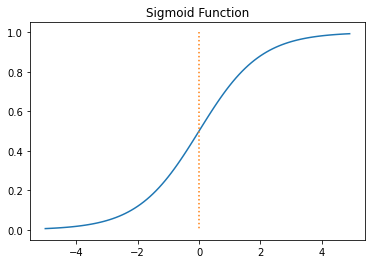

In [18]:
# 시그모이드

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0, 0], [1, 0], ':')
plt.title('Sigmoid Function')
plt.show()

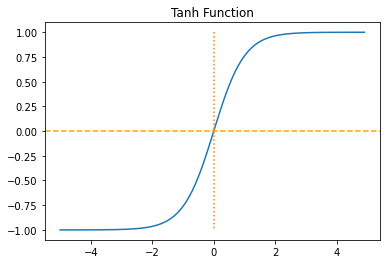

In [20]:
# 하이퍼볼릭 탄젠트 함수

x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0, 0],[1.0, -1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

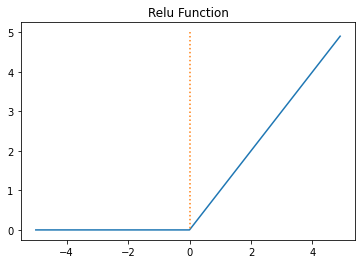

In [21]:
# ReLu

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0, 0],[5.0, 0.0], ':')
plt.title('Relu Function')
plt.show()

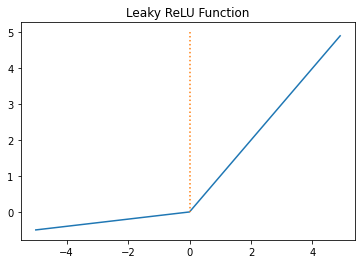

In [22]:
# Leaky ReLu

a = 0.1

def leaky_relu(x):
    return np.maximum(a * x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0, 0], [5.0, 0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

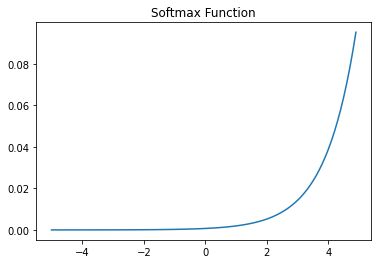

In [23]:
# Softmax

x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

# 다층 퍼셉트론 손글씨 분류

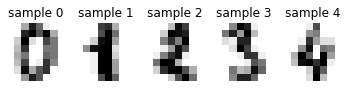

In [27]:
%matplotlib inline
from sklearn.datasets import load_digits

digits = load_digits()
image_label = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(image_label[:5]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'sample {label}')

In [29]:
X = digits.data
y = digits.target

X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [30]:
import torch
import torch.nn as nn
from torch import optim

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
losses = []

In [31]:
for epoch in range(101):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f'{epoch}/100, cost: {loss.item():.6f}')
    
    losses.append(loss.item())

0/100, cost: 2.337175
10/100, cost: 2.090664
20/100, cost: 1.826225
30/100, cost: 1.521552
40/100, cost: 1.185452
50/100, cost: 0.864065
60/100, cost: 0.587410
70/100, cost: 0.407605
80/100, cost: 0.301335
90/100, cost: 0.235087
100/100, cost: 0.191348


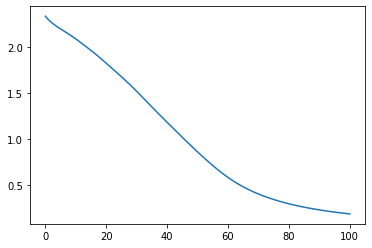

In [32]:
plt.plot(losses)
plt.show()

# 다층 퍼셉트론 MNIST 분류

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
%matplotlib inline

In [34]:
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)

X = mnist.data / 255
y = mnist.target

plt.imshow(X[0].reshape(28, 28), cmap='gray')

# 과적합 방지

# 기울기 소실과 폭주